<a href="https://colab.research.google.com/github/salianbharat/Deep/blob/Heart_Disease/Heart_Disease_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
file_path = '/content/drive/MyDrive/Dataset/Deep Learning Assignments/Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

# Convert the target variable to numeric
df['Heart Disease'] = df['Heart Disease'].apply(lambda x: 1 if x == 'Presence' else 0)

# Encode categorical variables (if any)
df_encoded = pd.get_dummies(df, columns=['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Ensure all features are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Check for any NaN values introduced by the conversion
print("NaN values after conversion:")
print(df_encoded.isnull().sum())

# Drop rows with NaN values
df_encoded = df_encoded.dropna()

# Verify no NaN values are left
print("NaN values after dropping rows with NaN:")
print(df_encoded.isnull().sum())

# Ensure all columns are numeric
print("Data types after conversion:")
print(df_encoded.dtypes)

# Check for non-numeric values in the dataset
for column in df_encoded.columns:
    non_numeric = df_encoded[~df_encoded[column].apply(np.isreal)]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column {column}:")
        print(non_numeric)

# Split the data
X = df_encoded.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease']

# Convert to numpy arrays to ensure compatibility with TensorFlow
X = X.to_numpy().astype(np.float32)
y = y.to_numpy().astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN architecture
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


NaN values after conversion:
Age                        0
Sex                        0
BP                         0
Cholesterol                0
FBS over 120               0
Max HR                     0
Exercise angina            0
ST depression              0
Number of vessels fluro    0
Heart Disease              0
Chest pain type_2          0
Chest pain type_3          0
Chest pain type_4          0
EKG results_1              0
EKG results_2              0
Slope of ST_2              0
Slope of ST_3              0
Thallium_6                 0
Thallium_7                 0
dtype: int64
NaN values after dropping rows with NaN:
Age                        0
Sex                        0
BP                         0
Cholesterol                0
FBS over 120               0
Max HR                     0
Exercise angina            0
ST depression              0
Number of vessels fluro    0
Heart Disease              0
Chest pain type_2          0
Chest pain type_3          0
Chest pain type_4 

2/2 [==============================] - 0s 16ms/step - loss: 0.3961 - accuracy: 0.8519
Accuracy: 0.85
2/2 [==============================] - 0s 14ms/step
Confusion Matrix:
 [[31  2]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        33
         1.0       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



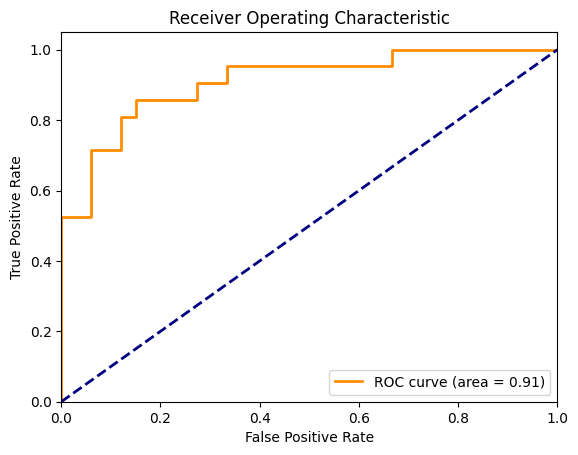

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print('Classification Report:\n', cr)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Convert back to DataFrame to get column names
X_df = pd.DataFrame(X, columns=df_encoded.drop('Heart Disease', axis=1).columns)

# Extract weights from the first layer
weights, biases = model.layers[0].get_weights()

# Calculate the mean absolute weights for each feature
mean_absolute_weights = np.mean(np.abs(weights), axis=1)

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame(mean_absolute_weights, index=X_df.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)



                         Importance
Exercise angina            0.266772
ST depression              0.224722
Number of vessels fluro    0.223623
Sex                        0.222432
EKG results_2              0.221933
BP                         0.219707
Thallium_6                 0.216257
EKG results_1              0.212670
Chest pain type_4          0.212158
Thallium_7                 0.210965
Age                        0.206255
Slope of ST_2              0.202410
Slope of ST_3              0.199111
Cholesterol                0.198876
FBS over 120               0.197539
Max HR                     0.174518
Chest pain type_3          0.170716
Chest pain type_2          0.166206


2/2 [==============================] - 0s 7ms/step - loss: 0.3961 - accuracy: 0.8519
Accuracy: 0.85
2/2 [==============================] - 0s 5ms/step
Confusion Matrix:
 [[31  2]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        33
         1.0       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



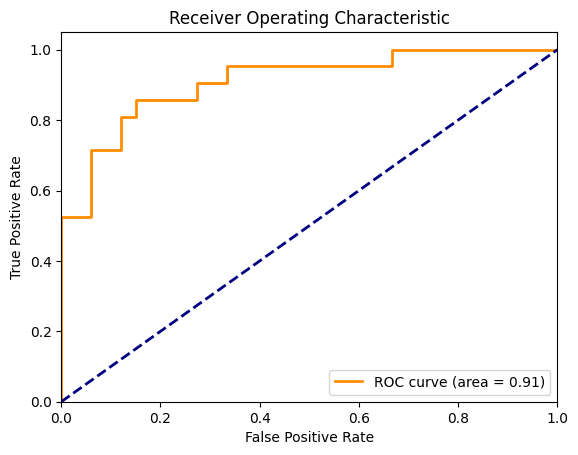

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
import numpy as np

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print('Classification Report:\n', cr)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Convert back to DataFrame to get column names
X_df = pd.DataFrame(X, columns=df_encoded.drop('Heart Disease', axis=1).columns)

# Extract weights from the first layer
weights, biases = model.layers[0].get_weights()

# Calculate the mean absolute weights for each feature


Detailed Interpretation
1. Classification Report:
The classification report provides precision, recall, and F1-score for each class:

Precision: The proportion of true positive results among the total predicted positives.
Recall: The proportion of true positive results among the total actual positives.
F1-Score: The harmonic mean of precision and recall.
Class 0 (No Heart Disease):

Precision: 0.84
Recall: 0.94
F1-Score: 0.89
Class 1 (Heart Disease):

Precision: 0.88
Recall: 0.71
F1-Score: 0.79
Overall Accuracy: 85%

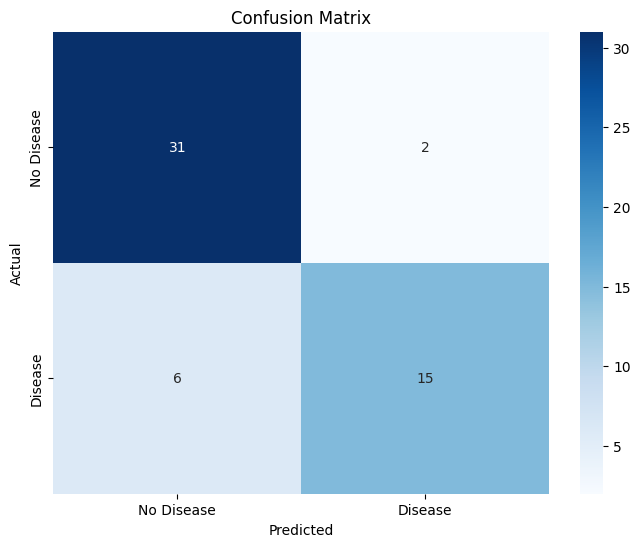

In [8]:
# Confusion Matrix Visualization
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


. ROC Curve:
The ROC curve provides a graphical representation of the trade-off between the true positive rate (recall) and the false positive rate.

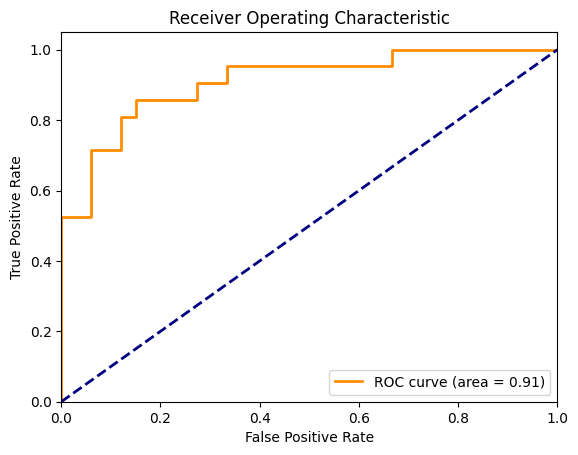

In [9]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Feature Importance:

                         Importance
Exercise angina            0.266772
ST depression              0.224722
Number of vessels fluro    0.223623
Sex                        0.222432
EKG results_2              0.221933
BP                         0.219707
Thallium_6                 0.216257
EKG results_1              0.212670
Chest pain type_4          0.212158
Thallium_7                 0.210965
Age                        0.206255
Slope of ST_2              0.202410
Slope of ST_3              0.199111
Cholesterol                0.198876
FBS over 120               0.197539
Max HR                     0.174518
Chest pain type_3          0.170716
Chest pain type_2          0.166206


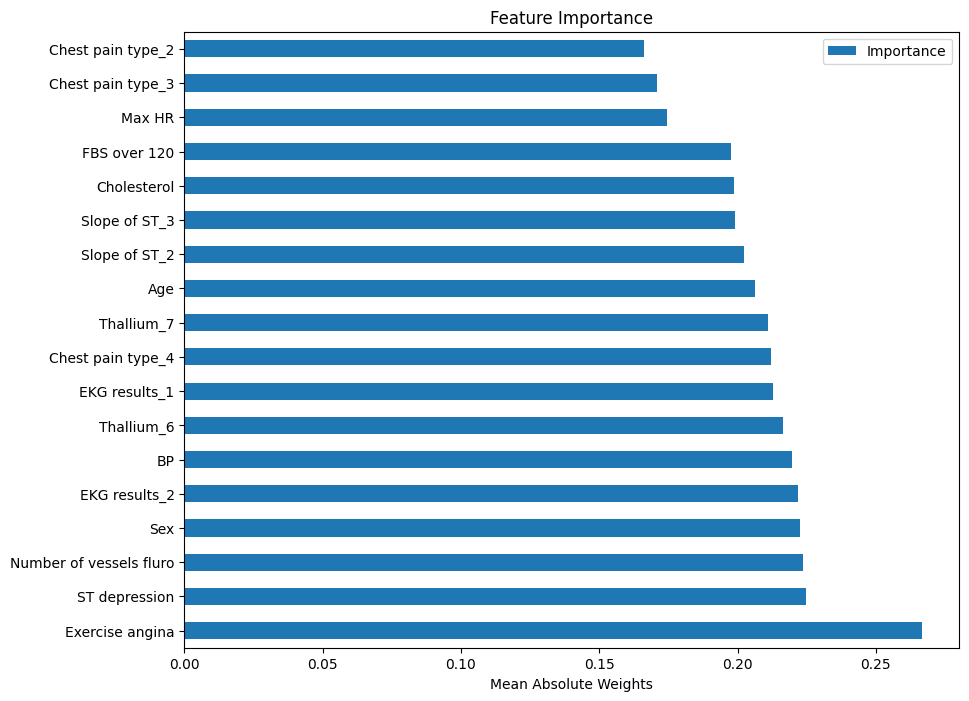

In [10]:
print("Feature Importance:\n")
print(feature_importance)
feature_importance.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance')
plt.xlabel('Mean Absolute Weights')
plt.show()


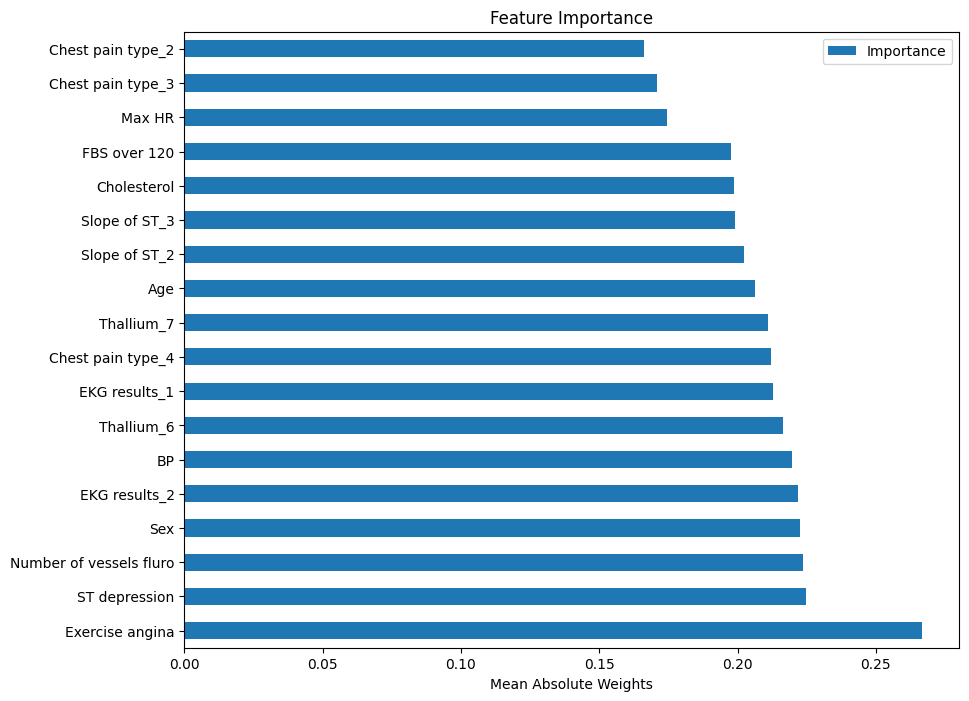

In [11]:
import matplotlib.pyplot as plt

# Plot Feature Importance
feature_importance.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance')
plt.xlabel('Mean Absolute Weights')
plt.show()


**Summary:**  
The model performed with an overall accuracy of 85%, which is quite good for a medical diagnosis problem.
The most important features contributing to heart disease prediction include exercise-induced angina, ST depression, and the number of major vessels detected by fluoroscopy.
Other significant features include gender, EKG results, blood pressure, and thallium test results.